In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=68f30ff89c178033dab0ce0a70850eb9


In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | taltal
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | narsaq
Processing Record 5 of Set 1 | mayo
Processing Record 6 of Set 1 | yomitan
City not found. Skipping...
Processing Record 7 of Set 1 | odlabari
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | andijon
Processing Record 10 of Set 1 | bogande
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | mukhen
Processing Record 22 of Set 1 | ho

Processing Record 34 of Set 4 | tayu
Processing Record 35 of Set 4 | gushikawa
Processing Record 36 of Set 4 | la libertad
Processing Record 37 of Set 4 | zapolyarnyy
Processing Record 38 of Set 4 | muros
Processing Record 39 of Set 4 | solotcha
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | ixtapa
Processing Record 42 of Set 4 | babanusah
City not found. Skipping...
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | bagdarin
Processing Record 46 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | castanos
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | manthani
Processing Record 1 of Set 5 | ye
City not found. Skipping...
Processing Record 2 of Set 5 | barrow
Processing Record 3 of Set 5 | vila
Processing Record 4 of Set 5 | hirado
Processing Record 5 of Set 5 | ribeira grande
Processing Record 6 of S

Processing Record 26 of Set 8 | boa vista
Processing Record 27 of Set 8 | odense
Processing Record 28 of Set 8 | sorvag
City not found. Skipping...
Processing Record 29 of Set 8 | hailey
Processing Record 30 of Set 8 | humaita
Processing Record 31 of Set 8 | alofi
Processing Record 32 of Set 8 | kasongo-lunda
Processing Record 33 of Set 8 | illapel
Processing Record 34 of Set 8 | mandalgovi
Processing Record 35 of Set 8 | kahului
Processing Record 36 of Set 8 | rorvik
Processing Record 37 of Set 8 | placido de castro
Processing Record 38 of Set 8 | san andres
Processing Record 39 of Set 8 | itarema
Processing Record 40 of Set 8 | boralday
Processing Record 41 of Set 8 | radcliffe
Processing Record 42 of Set 8 | mirnyy
Processing Record 43 of Set 8 | santa fe
Processing Record 44 of Set 8 | sangar
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | palembang
Processing Record 47 of Set 8 | cumana
Processing Record 48 of Set 8 | chardara
Processing Record 49 of Set 8 

Processing Record 14 of Set 12 | saint-pierre
Processing Record 15 of Set 12 | ulaangom
Processing Record 16 of Set 12 | warqla
City not found. Skipping...
Processing Record 17 of Set 12 | geraldton
Processing Record 18 of Set 12 | khandbari
Processing Record 19 of Set 12 | seybaplaya
Processing Record 20 of Set 12 | guymon
Processing Record 21 of Set 12 | beihai
Processing Record 22 of Set 12 | keffi
Processing Record 23 of Set 12 | vostok
Processing Record 24 of Set 12 | zaragoza
Processing Record 25 of Set 12 | tapiramuta
Processing Record 26 of Set 12 | okrika
Processing Record 27 of Set 12 | abilene
Processing Record 28 of Set 12 | palana
Processing Record 29 of Set 12 | baykit
Processing Record 30 of Set 12 | maksi
Processing Record 31 of Set 12 | teshie
Processing Record 32 of Set 12 | akusha
Processing Record 33 of Set 12 | tangshan
Processing Record 34 of Set 12 | port alberni
Processing Record 35 of Set 12 | kushima
Processing Record 36 of Set 12 | kusa
Processing Record 37 o

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Taltal,-25.4000,-70.4833,66.83,69,23,4.81,CL,2021-03-28 20:57:02
1,Bambous Virieux,-20.3428,57.7575,77.00,94,20,1.14,MU,2021-03-28 20:57:02
2,Hermanus,-34.4187,19.2345,66.99,72,100,7.00,ZA,2021-03-28 20:57:02
3,Narsaq,60.9167,-46.0500,24.80,58,0,2.30,GL,2021-03-28 20:57:03
4,Mayo,38.8876,-76.5119,73.00,68,40,10.36,US,2021-03-28 20:57:03
5,Odlabari,26.8333,88.6167,70.47,18,0,5.61,IN,2021-03-28 20:57:03
6,Rikitea,-23.1203,-134.9692,79.41,70,4,15.14,PF,2021-03-28 20:57:04
7,Andijon,40.7821,72.3442,50.00,100,100,21.00,UZ,2021-03-28 20:57:04
8,Bogande,12.9714,-0.1436,81.91,9,0,10.49,BF,2021-03-28 20:57:05
9,Albany,42.6001,-73.9662,52.00,88,100,7.54,US,2021-03-28 20:55:52


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Taltal,CL,2021-03-28 20:57:02,-25.4000,-70.4833,66.83,69,23,4.81
1,Bambous Virieux,MU,2021-03-28 20:57:02,-20.3428,57.7575,77.00,94,20,1.14
2,Hermanus,ZA,2021-03-28 20:57:02,-34.4187,19.2345,66.99,72,100,7.00
3,Narsaq,GL,2021-03-28 20:57:03,60.9167,-46.0500,24.80,58,0,2.30
4,Mayo,US,2021-03-28 20:57:03,38.8876,-76.5119,73.00,68,40,10.36
5,Odlabari,IN,2021-03-28 20:57:03,26.8333,88.6167,70.47,18,0,5.61
6,Rikitea,PF,2021-03-28 20:57:04,-23.1203,-134.9692,79.41,70,4,15.14
7,Andijon,UZ,2021-03-28 20:57:04,40.7821,72.3442,50.00,100,100,21.00
8,Bogande,BF,2021-03-28 20:57:05,12.9714,-0.1436,81.91,9,0,10.49
9,Albany,US,2021-03-28 20:55:52,42.6001,-73.9662,52.00,88,100,7.54


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

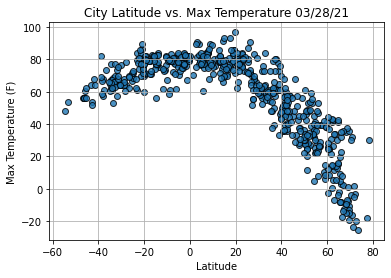

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

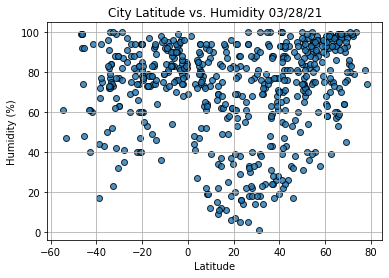

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

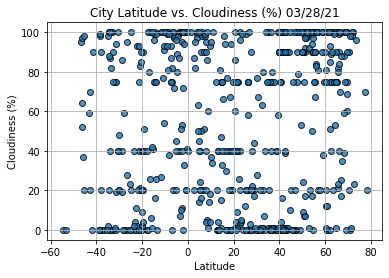

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

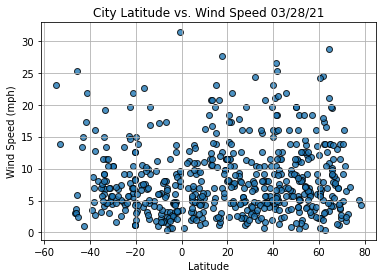

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()